In [131]:
#подключаю гуглдиск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
#import frameworks
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDClassifier #Импорт необходимой нам библиотеки

In [133]:
#Загрузка наших данных
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')
#Создание укороченной таблицы т.к. мы ищем зависимость роста от размера ноги и наоборот
df_cut=df[['Growth','Weight','Sex']]
#Исключаем нулевые значения
df_cut=df_cut.dropna()

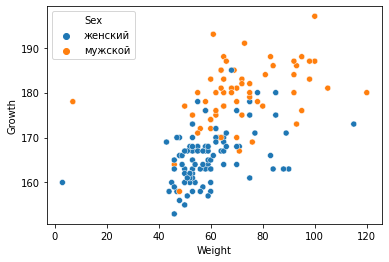

In [134]:
#Визуализируем распределения наших данных для наглядности
sns.scatterplot(data=df_cut, x='Weight', y='Growth', hue='Sex') 

Гипотеза: мужчины и женщины образуют два облака. Эти облака можно попытаться разделить прямой линией.

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Обучаем нормировщик методом .fit() и переводим в таблицу чисел методом .values.reshape(-1 - всегда,2 - должен соответствовать количеству признаков))
scaler.fit(df_cut[['Weight', 'Growth']].values.reshape(-1,2))
#Нормируем данные методом .transform()
arr=scaler.transform(df_cut[['Weight', 'Growth']].values.reshape(-1,2))

In [136]:
model=SGDClassifier()
model.fit(arr, y=df_cut['Sex'].values)

SGDClassifier()

In [137]:
# загружаем данные тестовой выборки
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Sex']]
df_test_cut=df_test_cut.dropna() #удаляем данные, имеющие пустые значения

In [138]:
#нормируем нашу таблицу
arr_test=scaler.transform(df_test_cut[['Weight', 'Growth']].values.reshape(-1,2))

ВНИМАНИЕ: Через функцию predict прогоняем объекты тестовой выборки

In [139]:
df_test_cut['Predicted']=model.predict(arr_test)       

In [140]:
df_test_cut.head()

,Growth,Weight,Sex,Predicted
0,180.0,78.0,мужской,мужской
1,167.0,50.0,женский,женский
2,178.0,70.0,женский,мужской
3,156.0,47.0,женский,женский
4,186.0,94.0,мужской,мужской


Метрики качества задачи классификации

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [142]:
#Процент правильно классифицированных объектов
print(accuracy_score(df_test_cut['Predicted'], df_test_cut['Sex']))

0.8961038961038961


In [143]:
pd.crosstab(df_test_cut['Predicted'], df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,42,3
мужской,5,27


In [144]:
#Для более наглядной визуализации запишем следующий код:
df_test_cut['Code']='0'
df_test_cut.loc[(df_test_cut['Sex']=='мужской') & (df_test_cut['Predicted']=='женский'),'Code']='1'
df_test_cut.loc[(df_test_cut['Sex']=='женский') & (df_test_cut['Predicted']=='мужской'),'Code']='2'

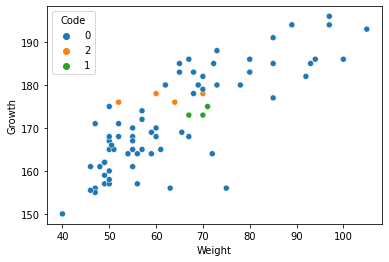

In [145]:
sns.scatterplot(data=df_test_cut, x='Weight', y='Growth', hue='Code') 

#Задача 1

Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv

Пронормируйте признаки 'Hair length','Shoe size' используя StandardScaler

Запустите модель KNeighborsClassifier(n_neighbors=3), и получите предсказания для студентов из тестовой выборки students_test.csv

С помощью команды pd.crosstab постройте матрицу ошибок (таблицу сопряженности) предсказанного и истинного пола студентов.

В отчет запишите количество студентов женского пола, которые были детектированы как женщины.

In [146]:
df_ex=df[['Hair length','Shoe size','Sex']]
#Исключаем нулевые значения
df_ex=df_ex.dropna()

In [147]:
#Подключаем стандартный нормалировщик
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(df_ex[['Hair length','Shoe size']].values.reshape(-1,2))
#Нормируем данные методом .transform()
arr_ex=scaler.transform(df_ex[['Hair length','Shoe size']].values.reshape(-1,2))

In [148]:
#Создаем модель искусственного интеллекта
#В скобках указано скольсо "соседей" мы используем для принятия решений
#С этим значением необходимо так же "поиграться" для определения наилучшего количества "соседей"
from sklearn.neighbors import KNeighborsClassifier #Импорт необходимой нам библиотеки
model_ex=KNeighborsClassifier(n_neighbors=3) 
model.fit(arr_ex, y=df_ex['Sex'].values)

SGDClassifier()

In [149]:
# загружаем данные тестовой выборки
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_ex=df_test[['Hair length','Shoe size','Sex']]
df_test_ex=df_test_ex.dropna() #удаляем данные, имеющие пустые значения

In [150]:
#нормируем нашу таблицу
arr_test_ex=scaler.transform(df_test_ex[['Hair length','Shoe size']].values.reshape(-1,2))

In [151]:
df_test_ex['Predicted']=model.predict(arr_test_ex)

In [152]:
#Матрица сопряженности(предсказанные значения, истинные значения)
pd.crosstab(df_test_ex['Predicted'], df_test_ex['Sex'])

Sex,женский,мужской
Predicted,,
женский,60,1
мужской,2,35


#Задача 2


Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv

Пронормируйте признаки 'Hair length','Shoe size' используя StandardScaler

Запустите модель SGDClassifier(random_state=0) (нужно написать фразу random_state=0, чтобы у всех обучающихся был одинаковый ответ), и получите предсказания для студентов из тестовой выборки students_test.csv

С помощью команды pd.crosstab постройте матрицу ошибок (таблицу сопряженности) предсказанного и истинного пола студентов.

В отчет запишите количество студентов мужского пола, которые были детектированы как мужчины.

In [153]:
#import frameworks
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDClassifier #Импорт необходимой нам библиотеки

In [154]:
#Загрузка наших данных
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')
#Создание укороченной таблицы т.к. мы ищем зависимость волос от размера ноги и наоборот
df_ex2=df[['Hair length','Shoe size','Sex']]
#Исключаем нулевые значения
df_ex2=df_ex2.dropna()

In [ ]:
#Визуализируем распределения наших данных для наглядности
sns.scatterplot(data=df_ex2, x='Hair length', y='Shoe size', hue='Sex') 

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Обучаем нормировщик методом .fit() и переводим в таблицу чисел методом .values.reshape(-1 - всегда,2 - должен соответствовать количеству признаков))
scaler.fit(df_ex2[['Hair length','Shoe size']].values.reshape(-1,2))
#Нормируем данные методом .transform()
arr_ex2=scaler.transform(df_ex2[['Hair length','Shoe size']].values.reshape(-1,2))

In [157]:
model=SGDClassifier()
model.fit(arr_ex2, y=df_ex2['Sex'].values)

SGDClassifier()

In [158]:
# загружаем данные тестовой выборки
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_ex2=df_test[['Hair length','Shoe size','Sex']]
df_test_ex2=df_test_ex2.dropna() #удаляем данные, имеющие пустые значения

In [159]:
#нормируем нашу таблицу
arr_test_ex2=scaler.transform(df_test_ex2[['Hair length','Shoe size']].values.reshape(-1,2))

In [160]:
df_test_ex2['Predicted']=model.predict(arr_test_ex2)  

In [ ]:
df_test_ex2.head()

In [162]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [163]:
#Процент правильно классифицированных объектов
print(accuracy_score(df_test_ex2['Predicted'], df_test_ex2['Sex']))

0.9795918367346939


In [ ]:
pd.crosstab(df_test_ex2['Predicted'], df_test_ex2['Sex'])